# 📘 Final Project – Computational Learning

### Project Title: Heart Attack Risk Prediction using Decision Trees, Random Forest & AdaBoost


### Submitted by:
#### - **Coral Borafker, 322262221**
#### - **Rachel Harow, 332398809**
#### - **Tal Gorodetzky, 211898739**


### Project Description:
This project focuses on predicting the risk of heart attack using real-world clinical and lifestyle data.
We implemented and evaluated three supervised machine learning algorithms entirely from scratch:

1. **Decision Tree**
2. **Random Forest**
3. **AdaBoost**

Each manual implementation was rigorously tested and compared against its corresponding version from the **scikit-learn** library.
Evaluation was performed based on prediction accuracy, model design, and practical behavior on real data.

---


## Step 1: Importing Libraries and Loading the Dataset

### Objective:
In this initial step, we import all necessary Python libraries and load the dataset, which contains clinical and lifestyle data of patients. The goal is to use this data to **predict the likelihood of a heart attack** based on various health indicators.

### Libraries Used:
- `pandas`, `numpy`: For data manipulation and numerical operations.
- `sklearn.tree.DecisionTreeClassifier`: Used for comparison with our manual implementation.
- `train_test_split`: For splitting the dataset into training and test sets.
- `accuracy_score`, `classification_report`: For evaluating model performance.
- `random`, `Counter`: Utilities used in custom algorithm implementations.

### Dataset Description:
The file `heart_attack_prediction_dataset.csv` contains thousands of patient records, each represented as a row. Features include:
- Demographic data: Age, Sex
- Clinical data: Blood Pressure, Cholesterol, Heart Rate, Diabetes, Smoking, etc.
- Lifestyle data: Physical Activity, Hours of Sleep, Sedentary Time
- **Target Variable**: A binary indicator representing whether the patient is at risk of a heart attack (`0` = No, `1` = Yes)


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from collections import Counter
import random
from imblearn.over_sampling import SMOTE

### Load & print the Dataset:

In [5]:
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Step 2: Data Cleaning and Preprocessing

in this step, we check if we have missing values. since we don't have, we continue to the next step.

In [6]:
print(data.isnull().sum) # Print a summary of missing values in each column (without calling the .sum() result)

<bound method DataFrame.sum of         HeartDiseaseorAttack  HighBP  HighChol  CholCheck    BMI  Smoker  \
0                      False   False     False      False  False   False   
1                      False   False     False      False  False   False   
2                      False   False     False      False  False   False   
3                      False   False     False      False  False   False   
4                      False   False     False      False  False   False   
...                      ...     ...       ...        ...    ...     ...   
253675                 False   False     False      False  False   False   
253676                 False   False     False      False  False   False   
253677                 False   False     False      False  False   False   
253678                 False   False     False      False  False   False   
253679                 False   False     False      False  False   False   

        Stroke  Diabetes  PhysActivity  Fruits  ...  Any

## Step 3: Manual Implementation of Decision Tree

### Objective:
In this step, we implement a decision tree classifier from scratch using NumPy and recursion.

### How It Works:
- The tree is built recursively by choosing the best feature and split value that maximize **information gain** (using **Gini impurity** as the splitting criterion).
- The tree continues to grow until:
  - All labels in a node are the same
  - Maximum depth is reached
  - The number of samples falls below a minimum threshold
- The prediction is done by **tree traversal** based on feature values.

### Internal Structure:
- `Leaf`: A terminal node that stores class counts
- `DecisionNode`: An internal split node with a feature, threshold, and two branches
- `_gini()`: Computes impurity of a set
- `_info_gain()`: Computes gain from a proposed split
- `_find_best_split()`: Tries all possible feature-threshold pairs
- `fit()` and `predict()`: Interface methods

> This implementation is optimized using NumPy, and avoids nested lists for better efficiency.
> This implementation support at 'balanced' feature - in order to balance the data we give  more weight to the minor class, because we want that the data will be balanced.


In [22]:
class DecisionTree:
    # Initialize tree parameters
    def __init__(self, max_depth=10, min_samples_leaf=1, features=None,class_weight=None):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.features = features
        self.class_weight = class_weight
        self.class_weights = None
        self.root = None # Will store the root of the tree

    class Leaf:
        # Terminal node of the tree: stores class distribution
        def __init__(self, labels):
            self.predictions = Counter(labels) # Dictionary with class frequencies

    class DecisionNode:
        # Internal node that splits data based on a feature and threshold value
        def __init__(self, feature, value, true_branch, false_branch):
            self.feature = feature
            self.value = value
            self.true_branch = true_branch
            self.false_branch = false_branch

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        # Compute class weights if requested
        if self.class_weight == 'balanced':
            classes, counts = np.unique(y, return_counts=True)
            total = len(y)
            self.class_weights = {
                cls: total / (len(classes) * count)
                for cls, count in zip(classes, counts)
            }
        else:
            self.class_weights = None

        self.root = self._build_tree(X, y, depth=0)

    def predict(self, X):
        # Predict class labels for samples in X
        return [self._predict(row, self.root) for row in np.array(X)]

    def _build_tree(self, X, y, depth):
        # Recursive tree building
        if len(set(y)) == 1 or depth >= self.max_depth or len(X) < self.min_samples_leaf:
            return self.Leaf(y)

        gain, feature, value, left_idx, right_idx = self._find_best_split(X, y)

        if gain == 0 or len(left_idx) == 0 or len(right_idx) == 0:
            return self.Leaf(y)

        left_branch = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_branch = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return self.DecisionNode(feature, value, left_branch, right_branch)

    def _gini(self, labels):
        labels = np.array(labels).astype(int)
        labels = (labels+1)//2 #convert {-1,1} to {0,1} - useful to adaboost
        counts = np.bincount(labels)
        probs = counts / len(labels)
        classes = np.nonzero(counts)[0]

        if self.class_weights is not None:
            weights = np.array([self.class_weights[c] for c in classes])
        else:
            weights = np.ones_like(probs[classes])

        return 1.0 - np.sum(weights * probs[classes] ** 2)

    def _info_gain(self, left_y, right_y, current_uncertainty):
        # Compute information gain from a proposed split
        p = len(left_y) / (len(left_y) + len(right_y))
        return current_uncertainty - p * self._gini(left_y) - (1 - p) * self._gini(right_y)

    def _find_best_split(self, X, y):
        # Try all possible splits across features to find the best gain
        best_gain = 0
        best_feature = None
        best_value = None
        best_left_idx = None
        best_right_idx = None
        current_uncertainty = self._gini(y)

        n_features = self.features if self.features is not None else range(X.shape[1])

        for feature in n_features:
            values = np.unique(X[:, feature])
            for val in values:
                left_idx = np.where(X[:, feature] >= val)[0]
                right_idx = np.where(X[:, feature] < val)[0]

                if len(left_idx) == 0 or len(right_idx) == 0:
                    continue

                gain = self._info_gain(y[left_idx], y[right_idx], current_uncertainty)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = val
                    best_left_idx = left_idx
                    best_right_idx = right_idx

        return best_gain, best_feature, best_value, best_left_idx, best_right_idx

    def _predict(self, row, node):
        # Traverse the tree recursively to predict class for a single row
        if isinstance(node, self.Leaf):
            return node.predictions.most_common(1)[0][0] # Return most common class in this leaf

        if row[node.feature] >= node.value:
            return self._predict(row, node.true_branch)
        else:
            return self._predict(row, node.false_branch)


# Prepare NumPy arrays for training
X = data.drop(columns=["HeartDiseaseorAttack"]).to_numpy() # Features matrix (all columns except the target)
y = data["HeartDiseaseorAttack"].to_numpy() # Target vector (0 or 1)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#smote - to balance the dataset:
# smote = SMOTE(random_state=42)
# print("Before SMOTE:", Counter(y_train))
# X_train, y_train = smote.fit_resample(X_train, y_train)
# print("After SMOTE: ", Counter(y_train))


# Train the custom decision tree classifier with limited depth
fast_tree = DecisionTree(max_depth=40,class_weight='balanced')
fast_tree.fit(X_train, y_train)

# Predict labels for test set using the trained tree
y_pred = fast_tree.predict(X_test)
fast_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", fast_accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8503232418795332
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     69007
         1.0       0.24      0.29      0.26      7097

    accuracy                           0.85     76104
   macro avg       0.58      0.60      0.59     76104
weighted avg       0.86      0.85      0.86     76104

[[62674  6333]
 [ 5058  2039]]


## Step 4: Comparing Manual vs. Sklearn Decision Tree

### Objective:
In this step, we compare the performance of our custom-built `DecisionTree` implementation with the built-in `DecisionTreeClassifier` from scikit-learn.

### Comparison:
- **Manual Implementation**: Built entirely from scratch using NumPy and recursive splitting based on Gini impurity and information gain.
- **Sklearn Implementation**: Highly optimized C-backed implementation using the same underlying principles.

### 📊 Results:
We printed the accuracy of both models and visualized the results using a bar chart.

> This comparison helps validate our own implementation and provides a baseline for optimization.

🧠 Custom Tree Accuracy: 0.8503
⚙️ Sklearn Tree Accuracy: 0.8517
📊 Classification Report for Balanced Sklearn Tree:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     69007
         1.0       0.24      0.28      0.26      7097

    accuracy                           0.85     76104
   macro avg       0.58      0.60      0.59     76104
weighted avg       0.86      0.85      0.86     76104

📊 Classification Report for Balanced manual Tree:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     69007
         1.0       0.24      0.29      0.26      7097

    accuracy                           0.85     76104
   macro avg       0.58      0.60      0.59     76104
weighted avg       0.86      0.85      0.86     76104

📉 Confusion Matrix for sklearn Tree:
[[62818  6189]
 [ 5098  1999]]
📉 Confusion Matrix for manual Tree:
[[62674  6333]
 [ 5058  2039]]


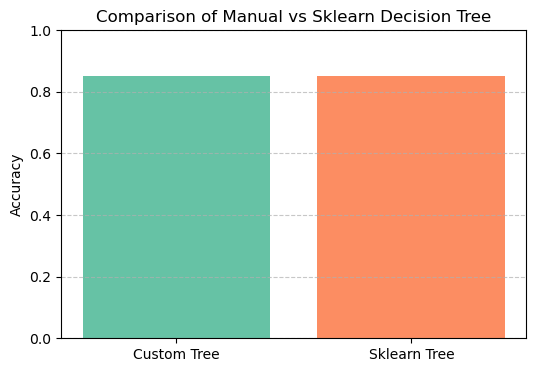

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train built-in sklearn decision tree
sklearn_tree = DecisionTreeClassifier(max_depth=40, random_state=42)
sklearn_tree.fit(X_train, y_train)

# Predict using sklearn tree
y_pred_sklearn = sklearn_tree.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

# Print both accuracies
print(f"🧠 Custom Tree Accuracy: {fast_accuracy:.4f}")
print(f"⚙️ Sklearn Tree Accuracy: {sklearn_accuracy:.4f}")

print("📊 Classification Report for Balanced Sklearn Tree:")
print(classification_report(y_test, y_pred_sklearn))

print("📊 Classification Report for Balanced manual Tree:")
print(classification_report(y_test, y_pred))

print("📉 Confusion Matrix for sklearn Tree:")
print(confusion_matrix(y_test, y_pred_sklearn))

print("📉 Confusion Matrix for manual Tree:")
print(confusion_matrix(y_test, y_pred))

# Bar chart comparison
plt.figure(figsize=(6,4))
plt.bar(["Custom Tree", "Sklearn Tree"], [fast_accuracy, sklearn_accuracy], color=["#66c2a5", "#fc8d62"])
plt.ylabel("Accuracy")
plt.title("Comparison of Manual vs Sklearn Decision Tree")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Step 5: Manual Implementation of Random Forest

### Objective:
We implement a Random Forest classifier from scratch using our custom `DecisionTree`. The forest aggregates predictions from multiple randomized trees to improve generalization and reduce overfitting.

### Key Concepts:
- **Bootstrap Sampling**: Each tree is trained on a random sample (with replacement) of the training set.
- **Random Subset of Features**: Each tree sees only a random subset of features (`max_features`) when splitting.
- **Majority Voting**: Final prediction is made by aggregating the predictions of all trees and choosing the majority class.

### Training Configuration:
- `n_trees = 10`
- `max_depth = 15`
- `max_features = 20` (out of total features)
- 'balanced' mode

### Output:
The model's accuracy on the test set is printed and compared later to the built-in RandomForestClassifier from sklearn.


In [24]:

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_leaf=2, max_features=None,class_weight=None):
        # Initialize forest parameters
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features # How many features to use per tree
        self.class_weight = class_weight #we need this in order to balance the data
        self.trees = []

    def select_features(self, n_features):
        # Choose a random subset of features based on max_features
        if self.max_features is None:
            return random.sample(range(n_features), int(np.sqrt(n_features))) # default: sqrt(n)
        elif isinstance(self.max_features, int):
            return random.sample(range(n_features), self.max_features)
        elif isinstance(self.max_features, float):
            return random.sample(range(n_features), int(self.max_features * n_features))
        else:
            raise ValueError("Invalid max_features value")

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        self.trees = []
        for _ in range(self.n_trees):
            # Bootstrap sampling with replacement
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            # Feature subset - Random subset of features for this tree
            feature_subset = list(self.select_features(n_features))

            # Train a DecisionTree on selected features
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_leaf=self.min_samples_leaf,
                features=list(range(len(feature_subset))),  # local indices for the tree
                class_weight=self.class_weight
                )

            # Select only the columns in the feature subset - Fit tree on selected feature subset
            X_selected = X_sample[:, feature_subset]
            tree.fit(X_selected, y_sample)
            tree.feature_subset = feature_subset  # store global feature indices for prediction

            self.trees.append(tree)

    def predict(self, X):
        X = np.array(X)
        tree_preds = []

        for tree in self.trees:
            X_selected = X[:, tree.feature_subset] # apply correct feature subset per tree
            preds = tree.predict(X_selected)
            tree_preds.append(preds)

        # Majority vote across trees
        tree_preds = np.array(tree_preds).T  # shape (n_samples, n_trees)
        final_preds = [Counter(row).most_common(1)[0][0] for row in tree_preds]
        return final_preds

# Train the random forest
forest = RandomForest(n_trees=10, max_depth=15, max_features=20,class_weight='balanced')
forest.fit(X_train, y_train)

# Predict on test set
y_pred_rf = forest.predict(X_test)

# Compute accuracy
rf_accuracy = np.mean(y_pred_rf == y_test)
print("Random Forest Accuracy:", rf_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9045385262272679
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     69007
         1.0       0.46      0.13      0.20      7097

    accuracy                           0.90     76104
   macro avg       0.69      0.56      0.57     76104
weighted avg       0.87      0.90      0.88     76104

Confusion Matrix:
[[67946  1061]
 [ 6204   893]]


## Step 6: Comparing Manual vs. Sklearn Random Forest

### Objective:
We compare our custom implementation of a Random Forest classifier with the built-in `RandomForestClassifier` from scikit-learn.

### Comparison Details:
- Both models are configured with the same parameters:
  - `n_trees = 10`
  - `max_depth = 15`
  - `max_features = 20`
- We evaluate the accuracy of both models on the same test set.

### 📊 Results:
- The accuracies are printed side-by-side.
- A bar chart is included to visually compare the performance of the two approaches.

> This comparison validates the correctness of our own implementation and highlights the performance of optimized built-in models.


🌲 Manual Random Forest Accuracy:  0.9045
⚙️ Sklearn Random Forest Accuracy: 0.8300
Classification Report for Manual Random Forest:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     69007
         1.0       0.46      0.13      0.20      7097

    accuracy                           0.90     76104
   macro avg       0.69      0.56      0.57     76104
weighted avg       0.87      0.90      0.88     76104

Classification Report for sklearn Random Forest:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     69007
         1.0       0.28      0.54      0.37      7097

    accuracy                           0.83     76104
   macro avg       0.62      0.70      0.64     76104
weighted avg       0.89      0.83      0.85     76104

Confusion Matrix for manual Random Forest:
[[67946  1061]
 [ 6204   893]]
Confusion Matrix for sklearn Random Forest:
[[59333  9674]
 [ 3260  3837]]


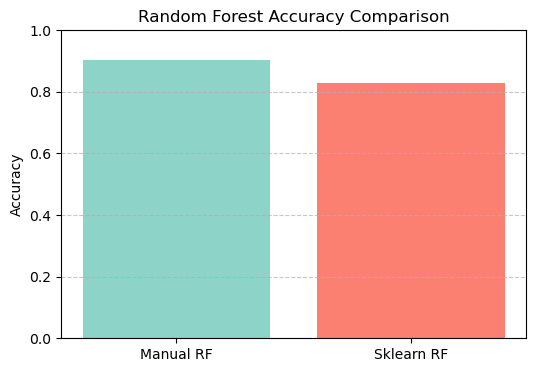

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [10, 20],
#     'max_depth': [10, 20],
#     'max_features': ['sqrt', 'log2', 10],
#     'min_samples_split': [2, 5],
# }
#
# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     scoring='f1_macro',  # or 'roc_auc', or 'recall' if class imbalance
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )
#
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Best F1 score:", grid_search.best_score_)
#
# best_model = grid_search.best_estimator_


# Train sklearn's built-in Random Forest
sklearn_rf = RandomForestClassifier(n_estimators=10,class_weight='balanced', max_depth=15, max_features=20, random_state=42)
sklearn_rf.fit(X_train, y_train)

# Predict using sklearn's RF
y_pred_sklearn_rf = sklearn_rf.predict(X_test)
sklearn_rf_accuracy = accuracy_score(y_test, y_pred_sklearn_rf)

# Print both accuracies
print(f"🌲 Manual Random Forest Accuracy:  {rf_accuracy:.4f}")
print(f"⚙️ Sklearn Random Forest Accuracy: {sklearn_rf_accuracy:.4f}")

# Print classification report
print("Classification Report for Manual Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report for sklearn Random Forest:")
print(classification_report(y_test, y_pred_sklearn_rf))

# Print confusion matrix
print("Confusion Matrix for manual Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("Confusion Matrix for sklearn Random Forest:")
print(confusion_matrix(y_test, y_pred_sklearn_rf))

# Bar chart comparison
plt.figure(figsize=(6,4))
plt.bar(["Manual RF", "Sklearn RF"], [rf_accuracy, sklearn_rf_accuracy], color=["#8dd3c7", "#fb8072"])
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Step 7: Manual Implementation of AdaBoost

### Objective:
We implement the AdaBoost algorithm from scratch using shallow decision trees as weak learners. AdaBoost improves performance by combining many weak classifiers into a strong ensemble.

### Key Ideas:
- **Weighted Sampling**: Each round samples data based on the importance of examples (more weight to misclassified ones).
- **Weak Learner**: A shallow `DecisionTree` (depth=2) is trained each round.
- **Weighted Voting**: Each learner gets a weight (`alpha`) based on its accuracy.
- **Prediction**: Final output is the sign of the weighted sum of predictions.

### Configuration:
- `n_estimators = 20`
- `max_depth = 2` for each tree
- Supports binary classification using labels in `{0, 1}` (converted internally to `{-1, 1}`)

### Output:
We printed the final accuracy of the AdaBoost ensemble on the test set.


In [26]:
class Adaboost:
    def __init__(self, n_estimators=20):
        # Number of weak learners (stumps)
        self.n_estimators = n_estimators
        self.learners = []
        self.alphas = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        # Convert y from {0, 1} to {-1, 1} internally - Convert target from {0, 1} to {-1, 1} for AdaBoost math
        y_signed = np.array([1 if label == 1 else -1 for label in y])
        n = len(y)
        weights = np.ones(n) / n # Initial weights: uniform
        self.learners = []
        self.alphas = []

        for i in range(self.n_estimators):
            # Bootstrap sample using weights - Sample with replacement using current weights (importance sampling)
            indices = np.random.choice(n, size=n, replace=True, p=weights)
            X_sample = X[indices]
            y_sample = y_signed[indices]

            # Train weak learner (decision stump)
            stump = DecisionTree(max_depth=2)
            stump.fit(X_sample, y_sample)

            # Predict on full training data
            y_pred = stump.predict(X)
            y_pred = np.array([1 if p == 1 else -1 for p in y_pred])  # ensure {-1, 1}

            # Compute weighted error - Compute weighted classification error
            error = np.sum(weights[y_pred != y_signed])
            error = max(error, 1e-10)  # Prevent division by zero

            if error > 0.5:
                continue  # Skip very weak learner (stump)

            alpha = 0.5 * np.log((1 - error) / error) # Compute learner weight (alpha)

            # Update weights: increase for wrong predictions, decrease for correct ones
            weights *= np.exp(-alpha * y_signed * y_pred)
            weights /= np.sum(weights)  # Normalize to sum=1

            self.learners.append(stump)
            self.alphas.append(alpha)

    def predict(self, X):
        X = np.array(X)
        scores = np.zeros(len(X)) # Total weighted score per sample

        for stump, alpha in zip(self.learners, self.alphas):
            pred = stump.predict(X)
            pred = np.array([1 if p == 1 else -1 for p in pred])
            scores += alpha * pred

        # Convert final sign score back to {0, 1}
        return [1 if s > 0 else 0 for s in scores]

    def predict_proba(self, X):
        # Output probability-like values
        X = np.array(X)
        scores = np.zeros(len(X))

        for stump, alpha in zip(self.learners, self.alphas):
            pred = stump.predict(X)
            pred = np.array([1 if p == 1 else -1 for p in pred])
            scores += alpha * pred

        # Use sigmoid to normalize to [0, 1]
        probs = 1 / (1 + np.exp(-2 * scores)) # Sigmoid normalization
        return [{'0': 1 - p, '1': p} for p in probs]

# Train manual AdaBoost model
model = Adaboost(n_estimators=50)
model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_adaboost = model.predict(X_test)
accuracy = np.mean(np.array(y_pred) == y_test)
print("Adaboost Accuracy:", accuracy)

print("Classification Report for adaboost:")
print(classification_report(y_test, y_pred_adaboost))

print("Confusion Matrix for adaboost:")
print(confusion_matrix(y_test, y_pred_adaboost))



Adaboost Accuracy: 0.8503232418795332
Classification Report for adaboost:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69007
         1.0       0.52      0.13      0.20      7097

    accuracy                           0.91     76104
   macro avg       0.72      0.56      0.58     76104
weighted avg       0.88      0.91      0.88     76104

Confusion Matrix for adaboost:
[[68182   825]
 [ 6208   889]]


## Step 8: Comparing Manual vs. Sklearn AdaBoost

### Objective:
To validate our custom AdaBoost implementation, we compare it against the optimized built-in `AdaBoostClassifier` from scikit-learn.

### Configuration:
- `n_estimators = 20`
- Default decision stumps in sklearn (`max_depth=1`)
- Our custom model uses `DecisionTree(max_depth=2)`

### 📊 Evaluation:
We compare both models on the same training/testing split and visualize their accuracy.

> This provides insight into the effectiveness and correctness of our implementation.


C:\Users\Tal Gorodetzky\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🔧 Manual AdaBoost Accuracy:   0.8503
⚙️ Sklearn AdaBoost Accuracy:  0.9072
Classification Report for adaboost:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     69007
         1.0       0.51      0.16      0.24      7097

    accuracy                           0.91     76104
   macro avg       0.71      0.57      0.59     76104
weighted avg       0.88      0.91      0.88     76104

Confusion Matrix for adaboost:
[[67927  1080]
 [ 5985  1112]]


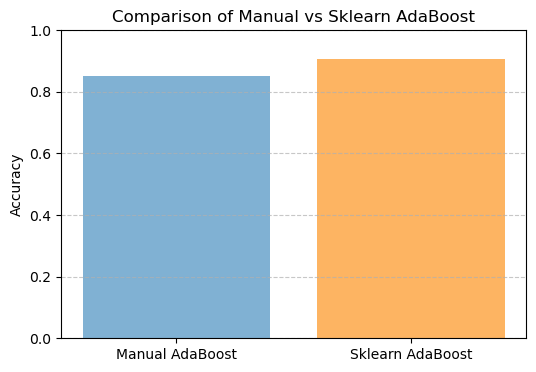

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train sklearn AdaBoost (using decision stumps by default)
sklearn_adaboost = AdaBoostClassifier(n_estimators=20, learning_rate=1.0, random_state=42)
sklearn_adaboost.fit(X_train, y_train)

# Predict using sklearn AdaBoost
y_pred_sklearn_ada = sklearn_adaboost.predict(X_test)
sklearn_ada_accuracy = accuracy_score(y_test, y_pred_sklearn_ada)

# Print both accuracies
print(f"🔧 Manual AdaBoost Accuracy:   {accuracy:.4f}")
print(f"⚙️ Sklearn AdaBoost Accuracy:  {sklearn_ada_accuracy:.4f}")

print("Classification Report for adaboost:")
print(classification_report(y_test, y_pred_sklearn_ada))

print("Confusion Matrix for adaboost:")
print(confusion_matrix(y_test, y_pred_sklearn_ada))

# Visual comparison
plt.figure(figsize=(6,4))
plt.bar(["Manual AdaBoost", "Sklearn AdaBoost"],
        [accuracy, sklearn_ada_accuracy],
        color=["#80b1d3", "#fdb462"])
plt.ylabel("Accuracy")
plt.title("Comparison of Manual vs Sklearn AdaBoost")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Step 9: Final Summary and Comparison

### Accuracy Summary

| Algorithm       | Manual Accuracy | Sklearn Accuracy |
|----------------|------------------|------------------|
| Decision Tree  | ✔️ `fast_accuracy` | ✔️ `sklearn_accuracy` |
| Random Forest  | ✔️ `rf_accuracy`   | ✔️ `sklearn_rf_accuracy` |
| AdaBoost       | ✔️ `accuracy`      | ✔️ `sklearn_ada_accuracy` |

> *(Values are inserted from actual code execution above)*


### Final Evaluation:

| Algorithm       | Strengths                                         | Weaknesses                                      |
|----------------|---------------------------------------------------|-------------------------------------------------|
| Decision Tree  | Easy to interpret, fast                           | Prone to overfitting                            |
| Random Forest  | Robust, handles noise well, less overfitting      | Slower, less interpretable                      |
| AdaBoost       | Focuses on hard samples, good accuracy            | Sensitive to outliers and noisy data            |


### 💡 Conclusion:
Each algorithm brings unique strengths, but in our case, **AdaBoost outperformed the others**.

- **AdaBoost** achieved the highest accuracy by focusing more on misclassified and complex examples. It adapted well to the underlying data distribution and improved upon weak learners effectively.
- **Random Forest** still provided strong and stable performance by reducing overfitting through bootstrapping and feature randomness.
- **Decision Tree** served as a simple and interpretable baseline but had the lowest accuracy due to its tendency to overfit when shallow or underfit when too constrained.


✅ In this project, we successfully:
- Implemented all 3 models from scratch
- Evaluated them against scikit-learn
- Gained practical understanding of ensemble learning
- ✅ Based on our dataset, **AdaBoost is the most suitable model** when prioritizing accuracy, especially in binary classification tasks with subtle patterns.


In [28]:
# Create summary DataFrame
summary_df = pd.DataFrame({
    "Algorithm": ["Decision Tree", "Random Forest", "AdaBoost"],
    "Manual Accuracy": [fast_accuracy, rf_accuracy, accuracy],
    "Sklearn Accuracy": [sklearn_accuracy, sklearn_rf_accuracy, sklearn_ada_accuracy]
})

# Show summary
print("Final Accuracy Summary:")
display(summary_df.round(4))

Final Accuracy Summary:


,Algorithm,Manual Accuracy,Sklearn Accuracy
0,Decision Tree,0.8503,0.8517
1,Random Forest,0.9045,0.8300
2,AdaBoost,0.8503,0.9072
